In [3]:
# !pip install matplotlib numpy pandas


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 参数：每隔几个 group 采样一个
step = 5  # 可修改为任意正整数

# 读取数据
df = pd.read_csv("InterpolatedOutput_0714_10.csv", names=["x", "y", "group"])

# 保证group是int类型
df["group"] = df["group"].astype(int)

# 获取所有的group并排序
group_ids = np.sort(df["group"].unique())

In [58]:
subgroup = group_ids.tolist()[:50]

In [59]:
# subgroup

In [60]:
df[df.group.isin(subgroup)].to_csv("tmp.csv", index=False)

[array([11434, 11435, 11436]), array([11451, 11452, 11453]), array([11631]), array([11647]), array([11670, 11671, 11672, 11673]), array([11712]), array([11923]), array([12160, 12161]), array([12212, 12213, 12214, 12215])]
3376.13
3375.902
3375.7740000000003
3375.7539999999995
3375.836
3375.298
3373.3839999999996
3373.3180000000007
3372.092


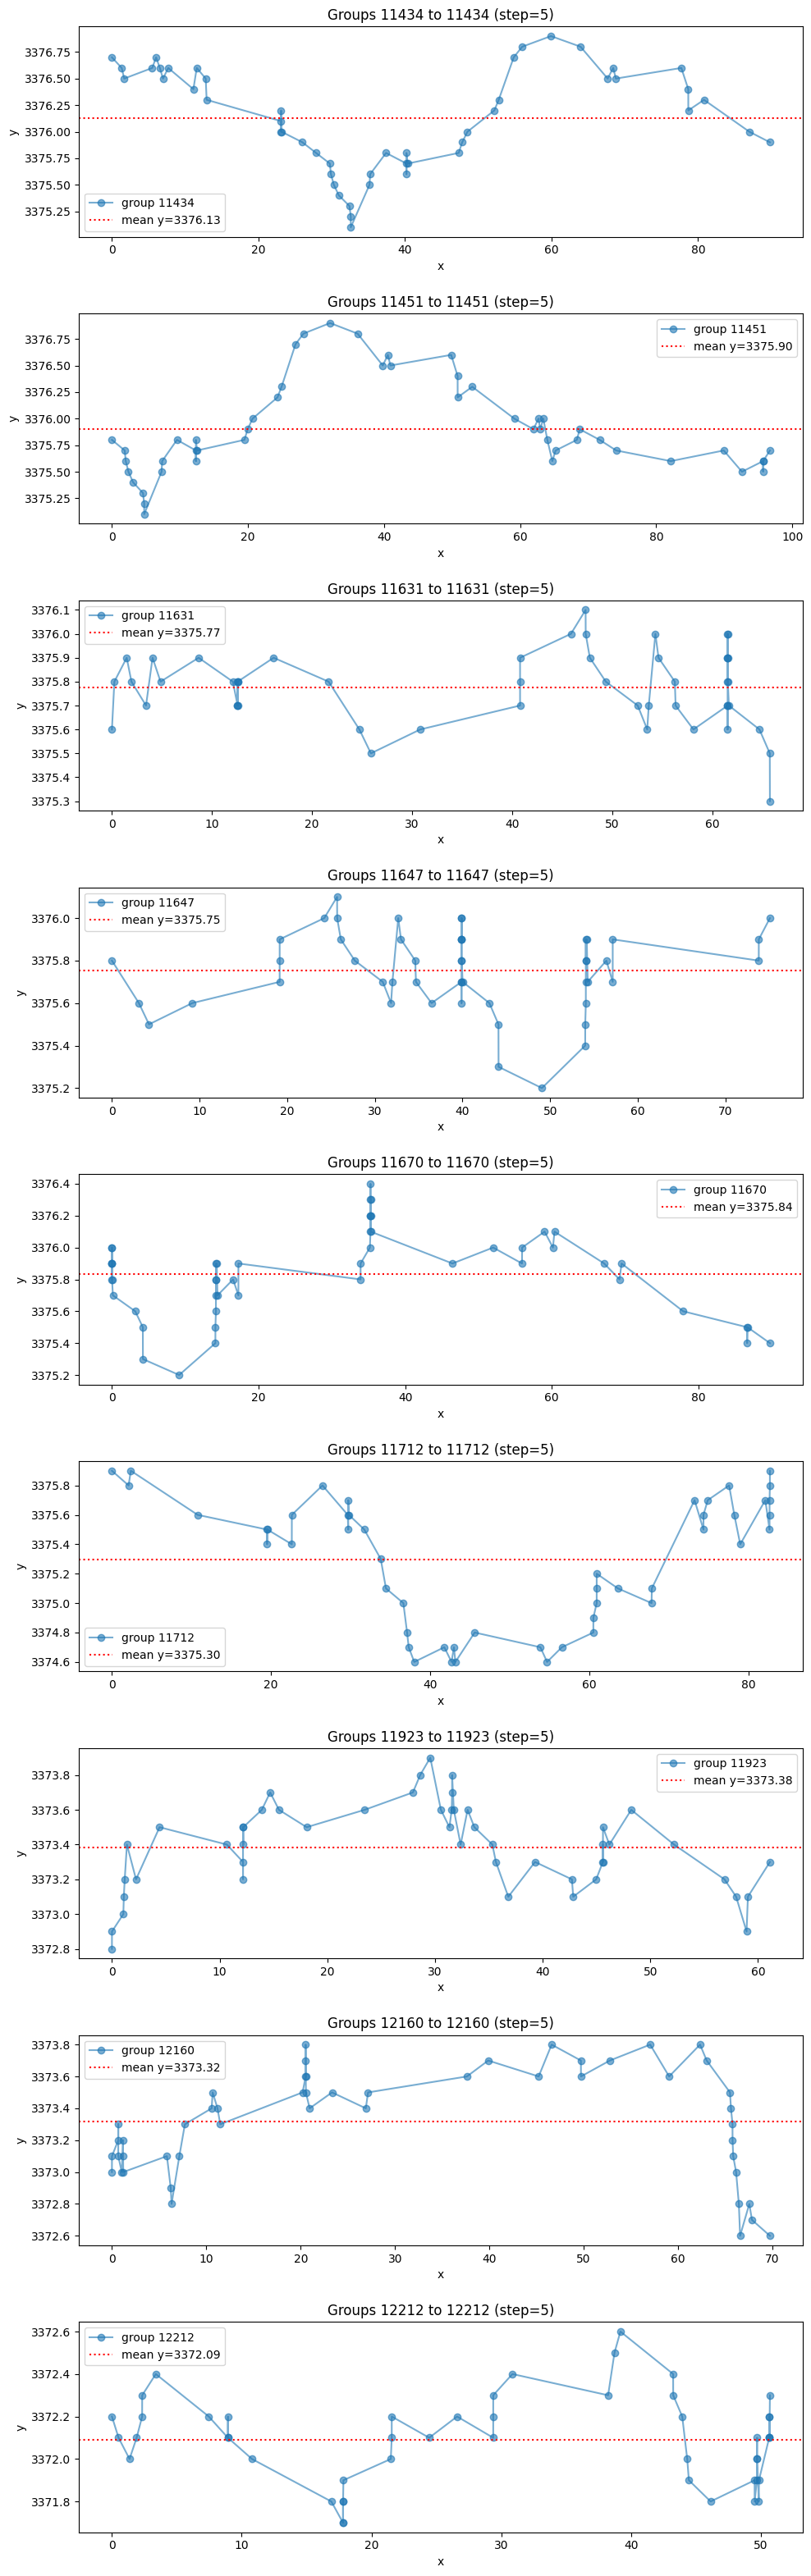

In [66]:
group_ids = np.sort(df[df.group.isin(subgroup)]["group"].unique())

# 找出相邻 group 差值 > 2 的地方，划分分段
diffs = np.diff(group_ids)
split_indices = np.where(diffs > 2)[0] + 1
group_segments = np.split(group_ids, split_indices)

# 准备画图，每段画到一个子图中
num_segments = len(group_segments)
fig, axes = plt.subplots(num_segments, 1, figsize=(10, 3.5 * num_segments), dpi=100)

# 如果只有一个子图，axes 不是数组
if num_segments == 1:
    axes = [axes]

print(group_segments)

# 使用列表推导获取每个数组的第一个元素
first_elements = [segment[0] for segment in group_segments]

# 绘图
for ax, segment in zip(axes, group_segments):
    # 每隔 step 个取一个 group
    sampled_groups = segment[::step]
    segment_df = df[df["group"].isin(sampled_groups)]
    
    # 获取该段的第一个group值作为基准
    first_group = sampled_groups[0]

    # print(first_group)
    
    for group in sampled_groups:
        group_data = segment_df[segment_df["group"] == group].copy()
        # 计算相对于第一个group的偏移量
        shift = group - first_group
        # 平移x坐标
        group_data["x"] = group_data["x"] + shift
        y_mean = group_data["y"].mean()
        print(y_mean)
        ax.plot(group_data["x"], group_data["y"], "o-", label=f"group {group}", alpha=0.6)
        ax.axhline(y_mean, color="red", linestyle=":", linewidth=1.5, label=f"mean y={y_mean:.2f}")



    
    ax.set_title(f"Groups {sampled_groups[0]} to {sampled_groups[-1]} (step={step})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()  # 可取消注释显示图例

# 调整子图间距
plt.tight_layout(h_pad=2.0)
plt.show()

In [56]:
df[df.group.isin(first_elements)].to_csv("sample.csv", index=False)